### **Step 1:** Get the Data

In [1]:
from fredapi import Fred
import os
from dotenv import load_dotenv

load_dotenv()

fred = Fred(api_key=os.getenv("FRED_API_KEY"))

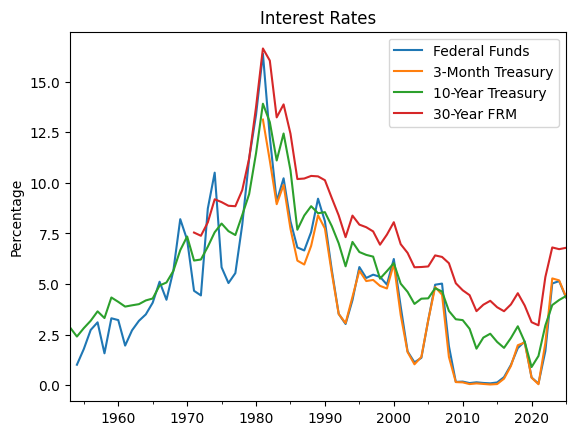

In [2]:
from matplotlib import pyplot as plt

ff = fred.get_series("FEDFUNDS").resample("YS").mean()
rate_3mo = fred.get_series("GS3M").resample("YS").mean()
rate_10y = fred.get_series("GS10").resample("YS").mean()
frm_30y = fred.get_series("MORTGAGE30US").resample("YS").mean()

ff.plot(label="Federal Funds")
rate_3mo.plot(label="3-Month Treasury")
rate_10y.plot(label="10-Year Treasury")
frm_30y.plot(label="30-Year FRM")
plt.title("Interest Rates")
plt.ylabel("Percentage")
plt.legend()

plt.show()

### **Step 2:** Preprocessing

In [3]:
import pandas as pd

df = pd.DataFrame({
    "Δ Federal Funds": ff,
    "Δ 3-Month Treasury": rate_3mo,
    "Δ 10-Year Treasury": rate_10y,
    "Δ 30-Year FRM": frm_30y
})

df = df.interpolate("linear").dropna()
df = df.diff(1).dropna()

df.head()

,Δ Federal Funds,Δ 3-Month Treasury,Δ 10-Year Treasury,Δ 30-Year FRM
1982-01-01,-4.120000,-2.026667,-0.909167,-0.597856
1983-01-01,-3.171667,-2.156667,-1.896667,-2.808269
1984-01-01,1.138333,0.953333,1.333333,0.642308
1985-01-01,-2.124167,-2.166667,-1.815000,-1.447500
1986-01-01,-1.295833,-1.575833,-2.940833,-2.242885


### **Step 3:** Analyze Rates' Relationships

In [10]:
from src.modelling import fit_lm
import src.plotting as plotting

plotting.set_theme()

alpha = 0.05

                            OLS Regression Results                            
Dep. Variable:     Δ 3-Month Treasury   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     651.7
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           3.35e-27
Time:                        14:39:05   Log-Likelihood:                -13.932
No. Observations:                  44   AIC:                             31.86
Df Residuals:                      42   BIC:                             35.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0362      0.052     

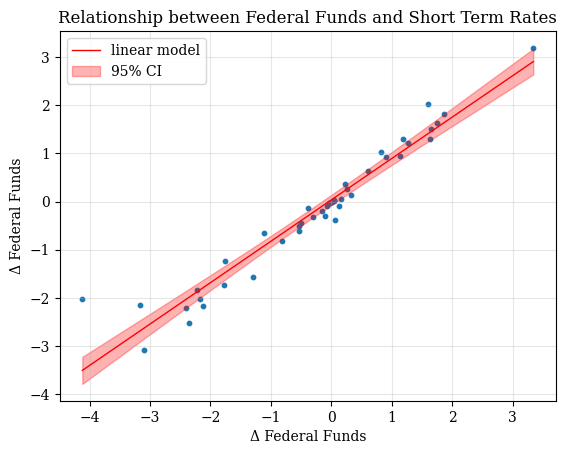

In [11]:
pred_3mo_from_ff, lm_3mo_from_ff = fit_lm(
    x=df["Δ Federal Funds"],
    y=df["Δ 3-Month Treasury"]
)

print(lm_3mo_from_ff.summary())

plotting.plot_lm(
    x=df["Δ Federal Funds"],
    y=df["Δ 3-Month Treasury"],
    predict_with_ci=pred_3mo_from_ff,
    alpha=alpha,
    title="Relationship between Federal Funds and Short Term Rates"
)

                            OLS Regression Results                            
Dep. Variable:     Δ 10-Year Treasury   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     38.75
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           1.89e-07
Time:                        14:40:16   Log-Likelihood:                -42.224
No. Observations:                  44   AIC:                             88.45
Df Residuals:                      42   BIC:                             92.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1265      0

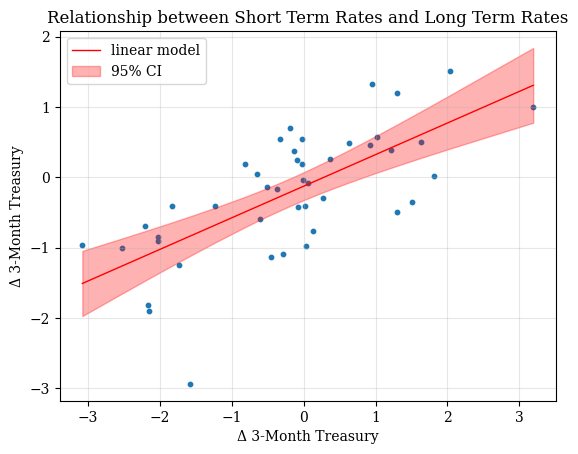

In [12]:
pred_10y_from_3mo, lm_10y_from_3mo = fit_lm(
    x=df["Δ 3-Month Treasury"],
    y=df["Δ 10-Year Treasury"]
)

print(lm_10y_from_3mo.summary())

plotting.plot_lm(
    x=df["Δ 3-Month Treasury"],
    y=df["Δ 10-Year Treasury"],
    predict_with_ci=pred_10y_from_3mo,
    alpha=alpha,
    title="Relationship between Short Term Rates and Long Term Rates"
)

                            OLS Regression Results                            
Dep. Variable:          Δ 30-Year FRM   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     201.0
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           1.32e-17
Time:                        14:41:15   Log-Likelihood:                -17.101
No. Observations:                  44   AIC:                             38.20
Df Residuals:                      42   BIC:                             41.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0314      0

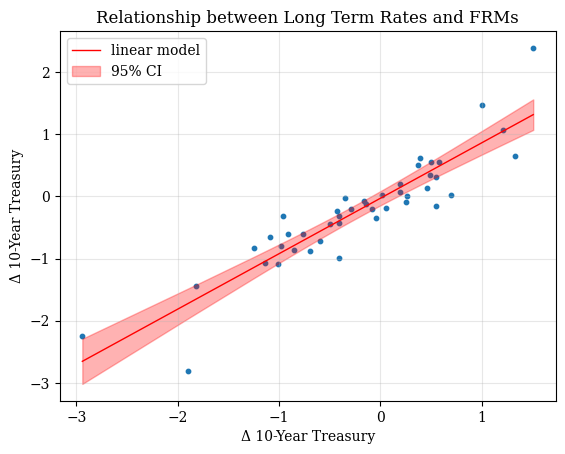

In [14]:
pred_30y_from_10y, lm_30y_from_10y = fit_lm(
    x=df["Δ 10-Year Treasury"],
    y=df["Δ 30-Year FRM"]
)

print(lm_30y_from_10y.summary())

plotting.plot_lm(
    x=df["Δ 10-Year Treasury"],
    y=df["Δ 30-Year FRM"],
    predict_with_ci=pred_30y_from_10y,
    alpha=alpha,
    title="Relationship between Long Term Rates and FRMs"
)